In [1]:
from augmentation import augmentation
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from config import *
filename = os.listdir(path_images)[0]
img = tifffile.imread(os.path.join(path_images, filename))
img_augmented = []
nb_twins = 20
for i in range(nb_twins+1):
    if i==0:
        img_augmented.append(tifffile.imread(os.path.join(path_images,filename)))
    else:
        img_augmented.append((augmentation(img/255,sigma = 8)*255).astype(np.uint8))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


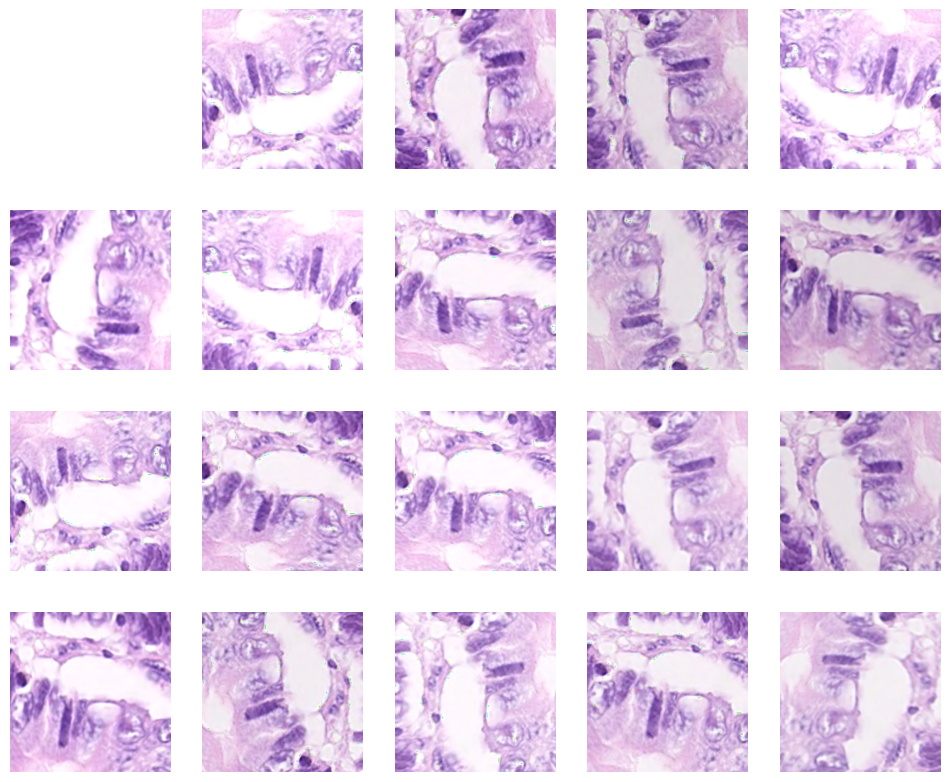

In [2]:


def plot_subfigure(images, rows=4, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 10))

    for i in range(rows):
        for j in range(cols):
            if i * cols + j < len(images):
                axes[i, j].imshow(images[i * cols + j])
                axes[i, j].axis('off')
    
    plt.show()

# Example usage:
# Assuming 'images' is a list of image arrays (numpy arrays)
# Replace this with your actual list of images
image_shape = (50, 50, 3)  # Adjust the shape based on your actual image size
images = img_augmented

plot_subfigure(images, rows=4, cols=5)